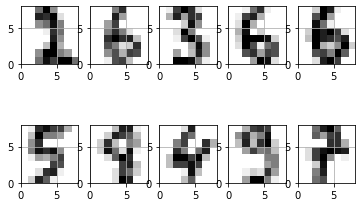

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_digits
import numpy as np
import random
digits = load_digits()
X,y = digits.data, digits.target
%matplotlib inline
random_examples = [random.randint(0,len(digits.images))
                  for i in range(10)]
for n,number in enumerate(random_examples):

  plt.subplot(2, 5, n+1)
  plt.imshow(digits.images[number],cmap='binary',
  interpolation='none', extent=[0,8,0,8])
  plt.grid()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
# We keep 30% random examples for test
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size=0.3, random_state=101)
# We scale the data in the range [-1,1]
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
from sklearn.svm import SVC
svm = SVC()
cv_performance = cross_val_score(svm, X_train, y_train,
cv=10)
test_performance = svm.fit(X_train, y_train).score(X_test,
y_test)

In [7]:
print ('Cross-validation accuracy score: %0.3f,'
       ' test accuracy score: %0.3f'
               % (np.mean(cv_performance),test_performance))

Cross-validation accuracy score: 0.986, test accuracy score: 0.987


In [13]:
from sklearn.model_selection import GridSearchCV
import numpy as np
learning_algo = SVC(kernel='linear', random_state=101)
search_space = [{'kernel': ['linear'],
'C': np.logspace(-3, 3, 7)},
{'kernel': ['rbf'],
'C':np.logspace(-3, 3, 7),
'gamma': np.logspace(-3, 2, 6)}]
gridsearch = GridSearchCV(learning_algo,
param_grid=search_space,
refit=True, cv=10)
gridsearch.fit(X_train,y_train)
print ('Best parameter: %s'
% str(gridsearch.best_params_))
cv_performance = gridsearch.best_score_
test_performance = gridsearch.score(X_test, y_test)
print ('Cross-validation accuracy score: %0.3f,'
' test accuracy score: %0.3f'
% (cv_performance,test_performance))


Best parameter: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation accuracy score: 0.988, test accuracy score: 0.987


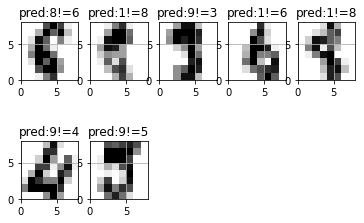

In [15]:
prediction = gridsearch.predict(X_test)
wrong_prediction = (prediction!=y_test)
test_digits = scaling.inverse_transform(X_test)
for n,(number,yp,yt) in enumerate(zip(scaling.inverse_transform(X_test)[wrong_prediction],prediction[wrong_prediction],y_test[wrong_prediction])):

  plt.subplot(2, 5, n+1)
  plt.imshow(number.reshape((8,8)),cmap='binary',interpolation='none',extent=[0,8,0,8])
  plt.title('pred:'+str(yp)+"!="+str(yt))
  plt.grid()
plt.show()